S Shape: (2,)
L2 error: 0.0007780314908006603


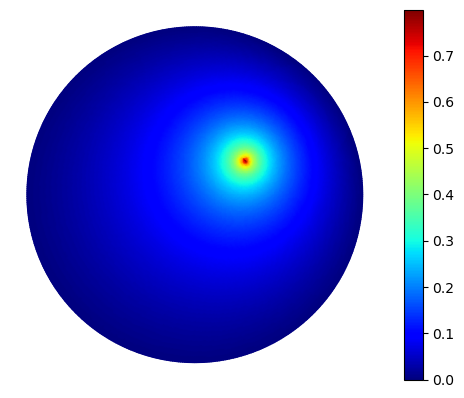

In [ ]:
r"""Point source.

Sources concentrated at points cannot be evaluated in the usual way, which
involves discrete quadrature; instead, it requires direct use of the basis
functions, as implemented in `CellBasis.point_source`.

Here this is demonstrated for a disk with homogeneous Dirichlet conditions.
The exact solution is the well-known Green's function (e.g. Sadybekov,
Turmetov, & Torebek 2015).

* Sadybekov, M. A., Turmetov, B. K. & Torebek, B. T. (2015). On an explicit
  form of the Green function of the Robin problem for the Laplace operator
  in a circle. *Advances in Pure and Applied Mathematics,* 6, 163-172.
  [doi: 10.1515/apam-2015-0003](https://doi.org/10.1515%2fapam-2015-0003)



"""
from functools import partial
from pathlib import Path

from skfem import *
from skfem.models.poisson import laplace, mass, unit_load
from skfem.io.json import from_file

import numpy as np


def greens(a: float, s: np.ndarray, x: np.ndarray) -> np.ndarray:
    """Return the Green's function for a disk of radius `a`

    with source at point `s`, evaluated at points `x`.
    """

    snorm = np.linalg.norm(s)
    sfull = s[:, None, None]
    numerator = np.linalg.norm(snorm ** 2 * x - a ** 2 * sfull, axis=0)
    denominator = a * snorm * np.linalg.norm(x - sfull, axis=0)
    return np.log(numerator / denominator) / 2 / np.pi

# Using their Solver
basis = Basis(MeshTri.init_circle(5), ElementTriP2())
source = np.array([0.3, 0.2])
A = asm(laplace, basis)
b = basis.point_source(source) # This is the difference from linear poisson
x = solve(*condense(A, b, D=basis.get_dofs())) # D is just boundary dofs, empty call automatically gets boundary

# Using Analytical Solution
a = np.linalg.norm(basis.mesh.p, axis=0).max()


exact = basis.project(lambda x: greens(a, source, x))
error = x - exact
l2error = np.sqrt(error @ mass.assemble(basis) @ error)



def visualize():
    from skfem.visuals.matplotlib import plot
    return plot(basis,
                x,
                shading='gouraud',
                nrefs=2,
                colorbar=True)

print("L2 error:", l2error)
visualize().show()

In [ ]:
print(basis.mesh.p)

(2, 2113)


In [ ]:
def greens_3d(s:np.ndarray,x:np.ndarray):
    denom = np.linalg.norm(s-x)
    if denom == 0: return 0
    else: return 1 / denom

print(greens_3d(np.array([0,0,0]),np.array([1,0,4])))

0.24253562503633297
